## Importing required models

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as k 

### GETTING IMAGES ADDRESSES


In [2]:
train_dir = 'C:/Users/USER/osasere data science/DATAs/train'
test_dir = 'C:/Users/USER/osasere data science/DATAs/test'
valid_dir = 'C:/Users/USER/osasere data science/DATAs/validation'



### PREPARING IMAGE DATA
1. read the picture files
2. convert the JPEG image to (150, 150) RGB grid of pixels
3. rescale the pixels values from (0 - 255) to (0 - 1)

In [3]:
train_datagen = ImageDataGenerator (rescale = 1./255)
test_datagen = ImageDataGenerator (rescale = 1./255)

train_generator = train_datagen.flow_from_directory (train_dir, target_size = (150, 150), batch_size = 20, class_mode = "binary")
validation_generator = test_datagen.flow_from_directory (valid_dir, target_size = (150, 150), batch_size = 20, class_mode = "binary")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.



CNN MODEL ACHITECTURE WITH 4 CONV LAYERS

In [4]:
model = models.Sequential ()
model.add (layers.Conv2D (filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add (layers.MaxPooling2D ((2, 2)))

model.add (layers.Conv2D (filters = 64, kernel_size = (3, 3), activation = "relu"))
model.add (layers.MaxPooling2D ((2, 2)))

model.add (layers.Conv2D (128, (3, 3), activation = "relu"))
model.add (layers.MaxPooling2D ((2, 2)))

model.add (layers.Conv2D (128, (3, 3), activation = "relu"))
model.add (layers.MaxPooling2D ((2, 2)))


model.add (layers.Flatten ())
model.add (layers.Dense (512, activation = "relu"))
model.add (layers.Dense (1, activation = "sigmoid"))

### TRAINING CNN MODEL
1. we are to use RMSprop optimizer because RMSprop optimizer work better than SGD for image classification

In [6]:
model.compile (loss = "binary_crossentropy", optimizer = keras.optimizers.RMSprop (lr = 0.001), metrics = "acc")
model_history = model.fit_generator (train_generator, steps_per_epoch = 100, epochs = 20, validation_data = validation_generator, validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 138s 1s/step - loss: 0.0865 - acc: 0.9790 - val_loss: 7.7167 - val_acc: 0.6570
Epoch 2/20
100/100 [==============================] - 136s 1s/step - loss: 0.1398 - acc: 0.9770 - val_loss: 1.1999 - val_acc: 0.7120
Epoch 3/20
100/100 [==============================] - 136s 1s/step - loss: 0.0527 - acc: 0.9880 - val_loss: 1.7945 - val_acc: 0.7630
Epoch 4/20
100/100 [==============================] - 136s 1s/step - loss: 0.0459 - acc: 0.9900 - val_loss: 2.2780 - val_acc: 0.7440
Epoch 5/20
100/100 [==============================] - 135s 1s/step - loss: 0.0713 - acc: 0.9820 - val_loss: 2.1163 - val_acc: 0.7250
Epoch 6/20
100/100 [==============================] - 134s 1s/step - loss: 0.0409 - acc: 0.9940 - val_loss: 2.6086 - val_acc: 0.7530
Epoch 7/20
100/100 [==============================] - 134s 1s/step - loss: 0.0609 - acc: 0.9835 - val_loss: 2.2589 - val_acc: 0.7430
Epoch 8/20
100/100 [==============================] - 135s 1s/step - 

PLOTTING TRAINED MODEL PERFORMANCE

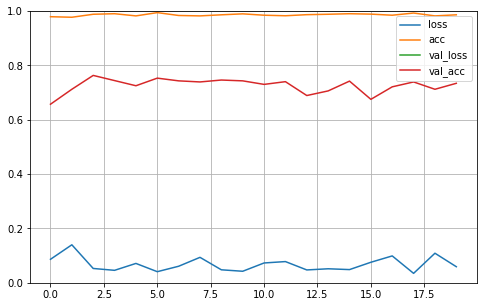

In [11]:
pd.DataFrame (model_history.history).plot (figsize = (8, 5))
plt.gca().set_ylim(0, 1)
plt.grid (True)
plt.show ()

since there is a huge difference in validation accuracy and trained accuracy there is overfitting in our data to remove the overfitting we use DATA AUGMENTATION

In [15]:
model.save ("cat-dog-model1.h5")


In [33]:
k.clear_session ()
del model

### DATA AUGMENTATION
1. data augmentation is the process of creating dummy images from our original images to increase the number of trained dataset
2. data augmentation is done only in the train dataset

In [4]:
train_datagen = ImageDataGenerator (rescale = 1./255, rotation_range = 40,
                                    width_shift_range = 0.2, height_shift_range = 0.2,
                                    shear_range = 0.2, zoom_range = 0.2, 
                                    horizontal_flip = True,)

test_datagen = ImageDataGenerator (rescale = 1./255)

train_generator = train_datagen.flow_from_directory (train_dir, target_size = (150, 150), batch_size = 20, class_mode = "binary")

valid_generator = test_datagen.flow_from_directory (valid_dir, target_size = (150, 150), batch_size = 20, class_mode = "binary")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### CNN MODEL ACHITECTURE WITH 4 CONV LAYERS AND A DROPOUT NEURON LAYER
1. DROPOUT is an effective method to avoid overfitting in our model

In [6]:
model = models.Sequential ()
model.add (layers.Conv2D (filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add (layers.MaxPooling2D ((2, 2)))

model.add (layers.Conv2D (filters = 64, kernel_size = (3, 3), activation = "relu"))
model.add (layers.MaxPooling2D ((2, 2)))

model.add (layers.Conv2D (128, (3, 3), activation = "relu"))
model.add (layers.MaxPooling2D ((2, 2)))

model.add (layers.Conv2D (128, (3, 3), activation = "relu"))
model.add (layers.MaxPooling2D ((2, 2)))


model.add (layers.Flatten ())
model.add (layers.Dropout (0.5))
model.add (layers.Dense (512, activation = "relu"))
model.add (layers.Dense (1, activation = "sigmoid"))

TypeError: ('Keyword argument not understood:', 'activatiwdon')

### TRAINING AUGMENTED DATA_SET

In [13]:
model.compile (loss = "binary_crossentropy", optimizer = keras.optimizers.RMSprop (lr = 0.001), metrics = "acc")
model.fit_generator (train_generator, steps_per_epoch = 100, epochs = 20, validation_data = validation_generator, validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 192s 2s/step - loss: 0.7178 - acc: 0.5215 - val_loss: 0.6865 - val_acc: 0.5800
Epoch 2/20
100/100 [==============================] - 189s 2s/step - loss: 0.6985 - acc: 0.5170 - val_loss: 0.6785 - val_acc: 0.6110
Epoch 3/20
100/100 [==============================] - 190s 2s/step - loss: 0.6918 - acc: 0.5780 - val_loss: 0.6948 - val_acc: 0.5460
Epoch 4/20
100/100 [==============================] - 192s 2s/step - loss: 0.6658 - acc: 0.6105 - val_loss: 0.6425 - val_acc: 0.5950
Epoch 5/20
100/100 [==============================] - 194s 2s/step - loss: 0.6745 - acc: 0.6160 - val_loss: 0.6363 - val_acc: 0.6280
Epoch 6/20
100/100 [==============================] - 192s 2s/step - loss: 0.6531 - acc: 0.6420 - val_loss: 0.6495 - val_acc: 0.6140
Epoch 7/20
100/100 [==============================] - 188s 2s/step - loss: 0.6365 - acc: 0.6355 - val_loss: 0.6031 - val_acc: 0.6520
Epoch 8/20
100/100 [==============================] - 187s 2s/step - 

### PLOTTING TRAINED AUGMENTED DATASET

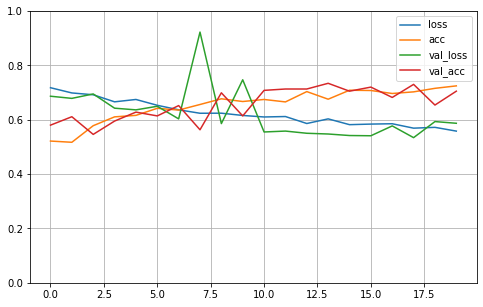

In [19]:
pd.DataFrame (model.history.history).plot (figsize = (8, 5))
plt.grid (True)
plt.gca().set_ylim(0, 1)
plt.show ()

In [20]:
model.save ("augmented-cat-dog-model.h5")

In [15]:
k.clear_session ()
del model

NameError: name 'model' is not defined

### TRANSFER LEARNING CAN FURTHER INCREASE THE MODEL PERFORMANCE

In [5]:
train_datagen = ImageDataGenerator (rescale = 1./255, rotation_range = 40,
                                    width_shift_range = 0.2, height_shift_range = 0.2,
                                    shear_range = 0.2, zoom_range = 0.2, 
                                    horizontal_flip = True,)

test_datagen = ImageDataGenerator (rescale = 1./255)

train_generator = train_datagen.flow_from_directory (train_dir, target_size = (150, 150), batch_size = 20, class_mode = "binary")

valid_generator = test_datagen.flow_from_directory (valid_dir, target_size = (150, 150), batch_size = 20, class_mode = "binary")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### USING VGG16 CONV BASE

In [6]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16 (weights = "imagenet", include_top = False, input_shape = (150, 150, 3))

### BUILDING TRANSFER LEARNING ACHITECTURE USING VGG16 CONV BASE

In [7]:
model = keras.models.Sequential ()
model.add (conv_base)

model.add (layers.Flatten())
model.add (layers.Dense (256, activation = "relu"))
model.add (layers.Dense (1, activation = "sigmoid"))
model.summary ()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


### TRAINING TRANSFER LEARNING MODEL

In [8]:
model.compile (loss = "binary_crossentropy", optimizer = keras.optimizers.RMSprop (lr = 0.00002), metrics = "acc")
model_history = model.fit_generator (train_generator, steps_per_epoch = 100, epochs = 1, validation_data = validation_generator, validation_steps = 50)


C:\Users\USER\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 2644s 26s/step - loss: 0.5155 - acc: 0.7385 - val_loss: 0.2449 - val_acc: 0.8990


PLOTTING TRAINED TRANSFER LEARNING MODEL PEFORMANCE

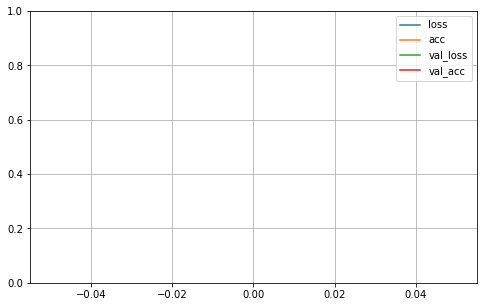

In [9]:
pd.DataFrame (model_history.history).plot (figsize = (8, 5))
plt.gca().set_ylim (0, 1)
plt.grid (True)
plt.show ()

EVALUATING TRANSFER LEARNING MODEL PERFOMANCE

In [10]:
model.save ("tranfer-learning-cat-dog-model.h5")

In [11]:
test_generator = test_datagen.flow_from_directory (test_dir, batch_size = 20, target_size = (150, 150), class_mode = "binary")
model.evaluate_generator (test_generator)
#print (test_generator[0])
#plt.imshow (test_generator)

Found 1000 images belonging to 2 classes.


C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.24839721620082855, 0.902999997138977]

In [41]:
arr = np.array ([[[[5]]]])
print (arr.shape)
test_generator.class_indices

(1, 1, 1, 1)


{'cats': 0, 'dogs': 1}